# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [19]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [20]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [21]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [22]:
feat_info('mort_acc')

Number of mortgage accounts.


<font size='5px' color='blue'/> 1 Libaraies and dataset<font/>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [7]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score
from numpy import median

<font size='5px' color='blue'/> 2 Exploratory Data analysis<font/>

## 2.1 Exploratory Data analysis

In [6]:
df=pd.read_csv('lending_club_loan_two.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.shape

(396030, 27)

In [9]:
df.head(20)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813"


In [174]:
df['emp_title'].uniqueque()
    # Drop it to many categories

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [165]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [167]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

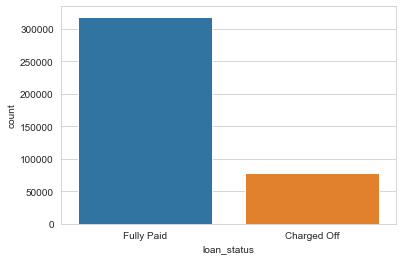

In [28]:
sns.countplot('loan_status',data=df)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purpose', ylabel='count'>

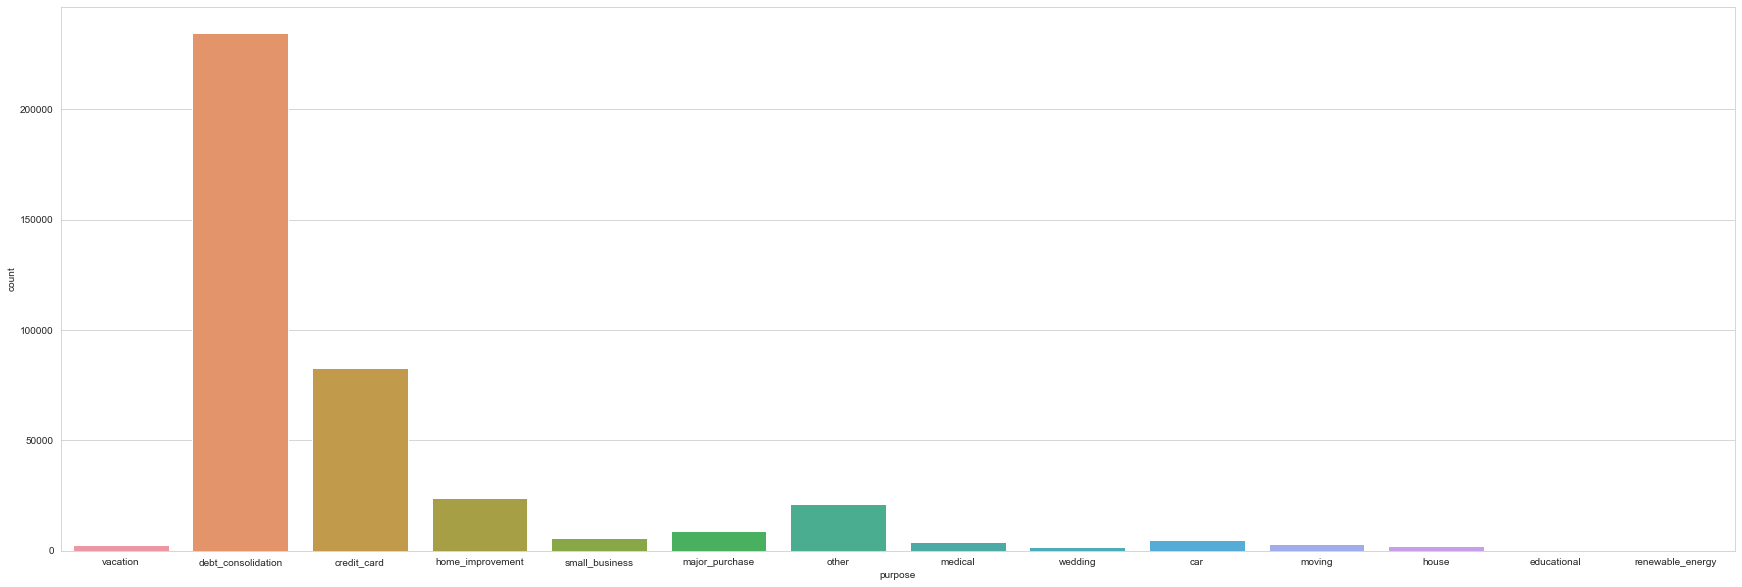

In [92]:
plt.figure(figsize=(30,10))
sns.countplot(df['purpose'])

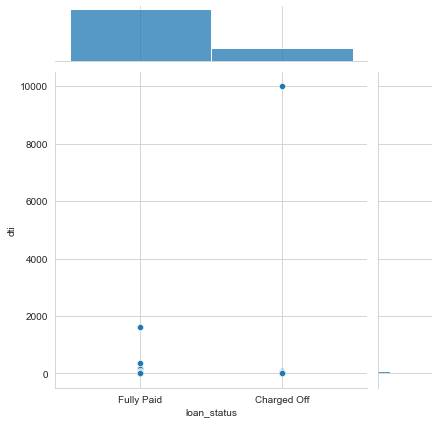

In [95]:
sns.jointplot(x='loan_status',y='dti',data=df)
    # Large values means you will not pay back your loan

In [106]:
df['revol_bal'].sort_values(ascending=False)

118582    1743266.0
244156    1298783.0
53563     1190046.0
119450    1030826.0
255310    1023940.0
            ...    
90213           0.0
23224           0.0
365639          0.0
288161          0.0
256306          0.0
Name: revol_bal, Length: 396030, dtype: float64

<AxesSubplot:xlabel='loan_status', ylabel='revol_bal'>

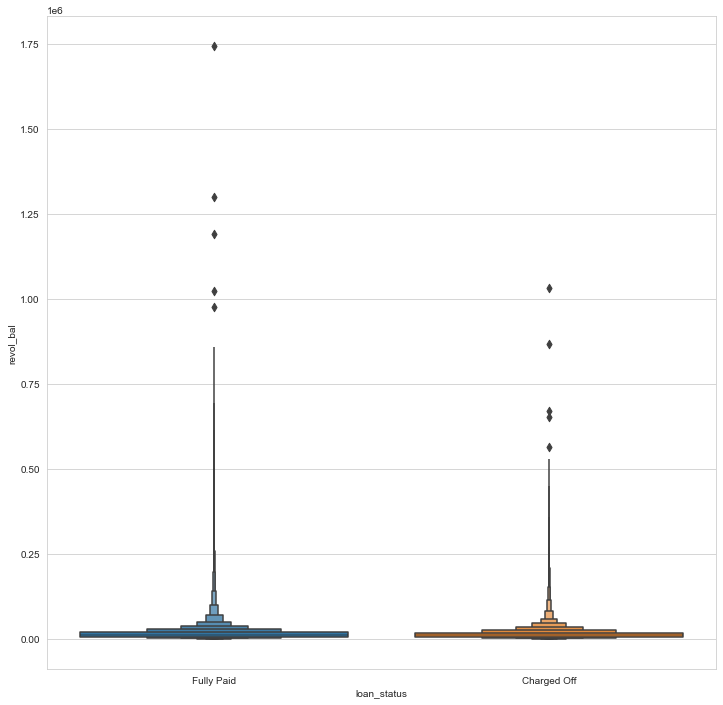

In [110]:
plt.figure(figsize=(12,12))
sns.boxenplot(x='loan_status',y='revol_bal',data=df)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

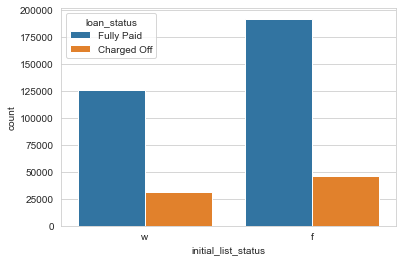

In [116]:
sns.countplot(df['initial_list_status'],hue=df['loan_status'])

<AxesSubplot:xlabel='loan_status', ylabel='total_acc'>

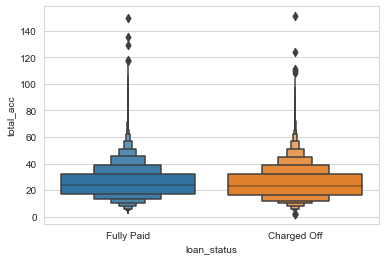

In [120]:
sns.boxenplot(y=df['total_acc'],x=df['loan_status'])

In [127]:
df.groupby(by='loan_status').median()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,
Charged Off,14000.0,15.61,399.06,59000.0,19.34,11.0,0.0,11277.0,59.3,23.0,1.0,0.0
Fully Paid,12000.0,12.99,369.51,65000.0,16.34,10.0,0.0,11158.0,53.7,24.0,1.0,0.0


In [132]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='application_type', ylabel='count'>

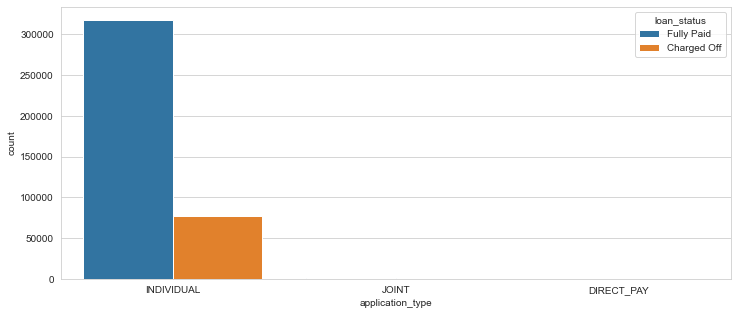

In [139]:
plt.figure(figsize=(12,5))
sns.countplot(df['application_type'],hue=df['loan_status'])

In [141]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [173]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [171]:
sorted(df['pub_rec_bankruptcies'].unique())

[0.0, 1.0, 2.0, 3.0, nan, 4.0, 5.0, 6.0, 7.0, 8.0]

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

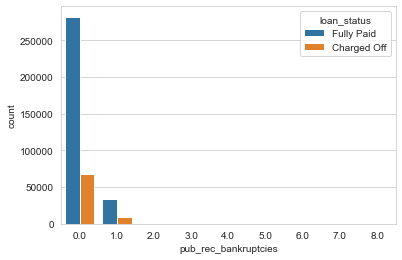

In [159]:
sns.countplot(df['pub_rec_bankruptcies'],hue=df['loan_status'])

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [12]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [13]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

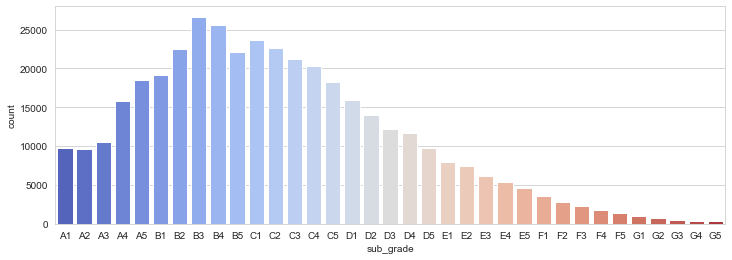

In [14]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

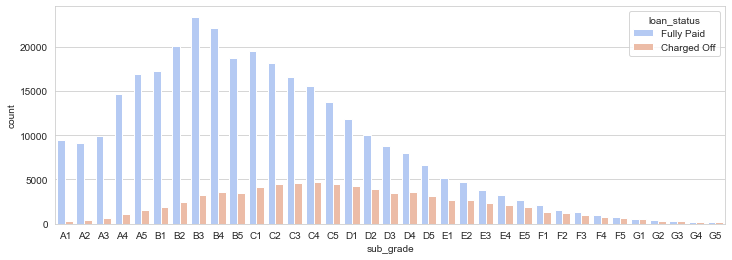

In [15]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

## 2.2 Missing data check

<AxesSubplot:>

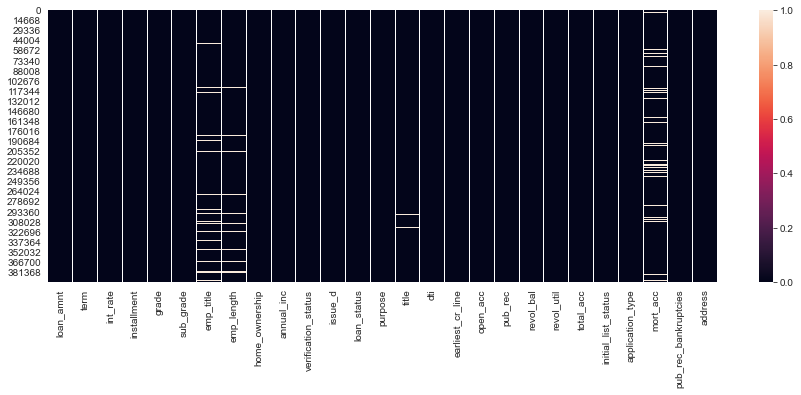

In [30]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())

In [24]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [179]:
df['emp_length'][0].replace('years','')

'10+ '

In [ ]:
for i in range(0, len(df)):
    if type(df['emp_length'][i])!=float:
        df['emp_length'][i]=df['emp_length'][i].replace('years','')
        df['emp_length'][i]=df['emp_length'][i].replace('<','')
        df['emp_length'][i]=df['emp_length'][i].replace('+','')
        df['emp_length'][i]=df['emp_length'][i].replace('year','')

<ipython-input-199-0e1112dbb70e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'][i]=df['emp_length'][i].replace('years','')
<ipython-input-199-0e1112dbb70e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'][i]=df['emp_length'][i].replace('<','')
<ipython-input-199-0e1112dbb70e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'][i]=df['emp_length'][i].replace('+','')
<ipython-input-199-0e

In [198]:
int((df['emp_length'])[1])

4

In [182]:
df.shape

(396030, 26)

In [34]:
feat_info('title')

The loan title provided by the borrower


In [26]:
feat_info('mort_acc')

Number of mortgage accounts.


In [27]:
df.shape

(396030, 27)

## 2.2.1 emp_length

In [76]:
df['emp_length'].replace('+',"")

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [77]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [78]:
def str_year (str):
    return str.replace('years','')
    

In [72]:
df['emp_length'].apply(lambda str:str.replace('years',''))

AttributeError: 'float' object has no attribute 'replace'

## 2.2.2 mort_acc

## 2.3 correlation

In [81]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.152340,0.954389,0.332247,0.025577,0.182940,-0.084162,0.326277,0.096734,0.210966,0.223526,-0.113071
int_rate,0.152340,1.000000,0.143927,-0.072658,0.165521,-0.000990,0.050886,-0.022230,0.272141,-0.045264,-0.080875,0.048942
installment,0.954389,0.143927,1.000000,0.325683,0.019783,0.170810,-0.076195,0.313485,0.119019,0.188001,0.193948,-0.106834
annual_inc,0.332247,-0.072658,0.325683,1.000000,-0.186110,0.125961,-0.010891,0.298210,0.024755,0.184841,0.238524,-0.048525
dti,0.025577,0.165521,0.019783,-0.186110,1.000000,0.293618,-0.054765,0.133558,0.181006,0.219550,-0.058003,-0.047313
open_acc,0.182940,-0.000990,0.170810,0.125961,0.293618,1.000000,-0.026063,0.213352,-0.144382,0.678333,0.107758,-0.034550
pub_rec,-0.084162,0.050886,-0.076195,-0.010891,-0.054765,-0.026063,1.000000,-0.105937,-0.087819,0.016103,0.013191,0.694376
revol_bal,0.326277,-0.022230,0.313485,0.298210,0.133558,0.213352,-0.105937,1.000000,0.223015,0.181975,0.199003,-0.129156
revol_util,0.096734,0.272141,0.119019,0.024755,0.181006,-0.144382,-0.087819,0.223015,1.000000,-0.112063,0.009465,-0.100703
total_acc,0.210966,-0.045264,0.188001,0.184841,0.219550,0.678333,0.016103,0.181975,-0.112063,1.000000,0.378633,0.039575


C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purpose', ylabel='count'>

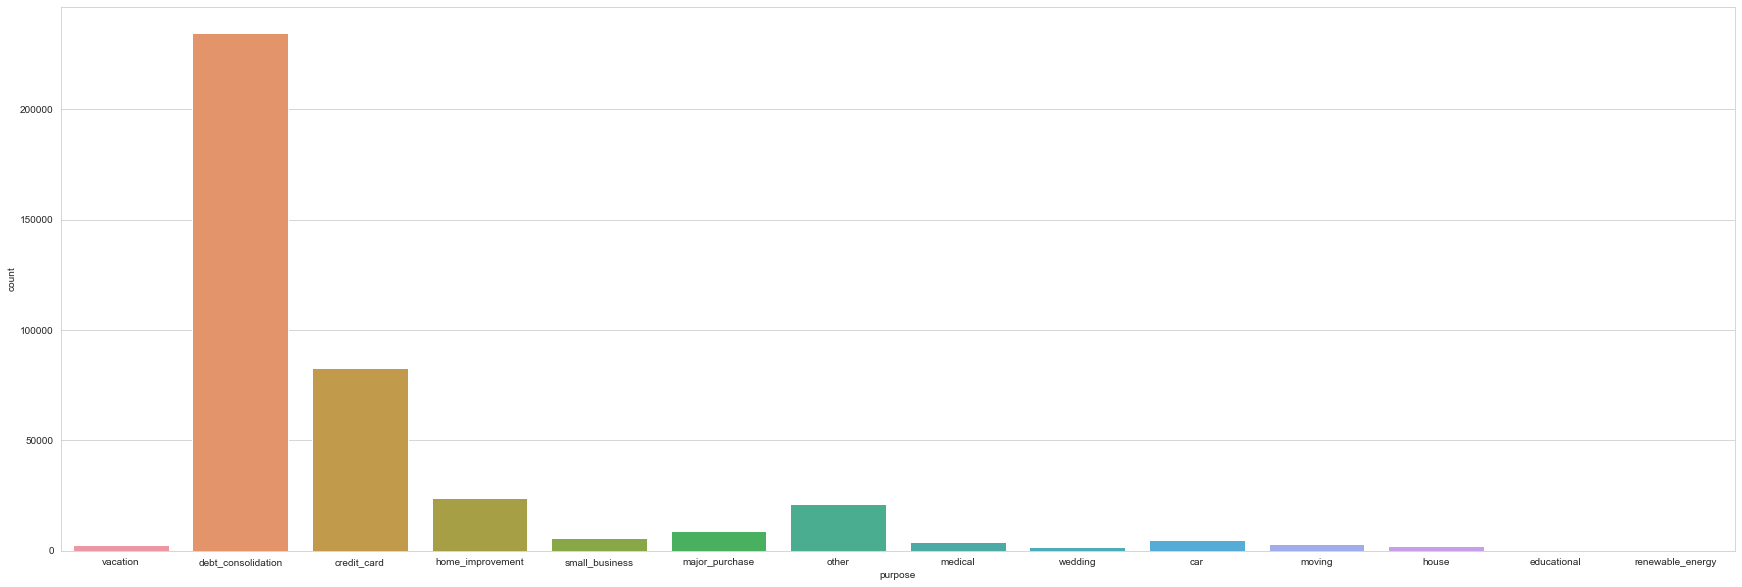

In [91]:
plt.figure(figsize=(30,10))
sns.countplot(df['purpose'])

In [65]:
df.groupby('loan_status').median()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,
Charged Off,14400.0,15.61,413.03,60000.0,19.74,11.0,0.0,11532.0,59.4,24.0,1.0,0.0
Fully Paid,12000.0,12.99,382.55,66000.0,16.68,11.0,0.0,11466.0,54.2,24.0,1.0,0.0


In [22]:
df.groupby('grade').median()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
grade,,,,,,,,,,,,
A,12000.0,7.62,365.940,73000.0,14.210,11.0,0.0,11480.0,36.7,25.0,2.0,0.0
B,11200.0,11.14,342.790,63000.0,16.250,10.0,0.0,11247.0,53.1,24.0,1.0,0.0
C,12000.0,14.31,353.400,60000.0,17.560,10.0,0.0,10942.0,58.6,23.0,1.0,0.0
D,12775.0,17.57,385.000,60000.0,18.410,10.0,0.0,10727.5,62.1,23.0,1.0,0.0
E,16450.0,20.30,480.105,63000.0,19.200,11.0,0.0,11883.5,63.6,24.0,1.0,0.0
F,19000.0,23.83,552.350,65000.0,19.160,11.0,0.0,11941.5,65.3,24.0,1.0,0.0
G,20000.0,25.83,598.030,69074.0,19.175,11.0,0.0,11624.5,64.5,24.0,1.0,0.0


In [32]:
df.groupby('sub_grade').median()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
sub_grade,,,,,,,,,,,,
A1,12000.0,6.03,361.920,80000.0,12.660,11.0,0.0,10349.0,23.40,26.0,2.0,0.0
A2,11200.0,6.62,337.750,74000.0,13.760,11.0,0.0,10614.0,30.00,26.0,2.0,0.0
A3,12000.0,7.51,367.855,73000.0,14.335,11.0,0.0,11636.0,35.90,25.0,2.0,0.0
A4,12000.0,7.90,371.960,70000.0,14.490,10.0,0.0,11646.0,40.60,25.0,2.0,0.0
A5,12000.0,8.49,377.090,71000.0,14.970,11.0,0.0,12263.0,45.20,25.0,2.0,0.0
B1,11500.0,9.67,343.640,65000.0,15.540,10.0,0.0,11481.5,47.60,24.0,1.0,0.0
B2,12000.0,10.64,360.080,65000.0,15.850,10.0,0.0,11671.0,51.30,24.0,1.0,0.0
B3,11200.0,11.63,345.380,62500.0,16.240,10.0,0.0,11317.0,54.00,23.0,1.0,0.0
B4,11500.0,12.35,345.890,62851.0,16.670,10.0,0.0,11299.0,55.50,24.0,1.0,0.0


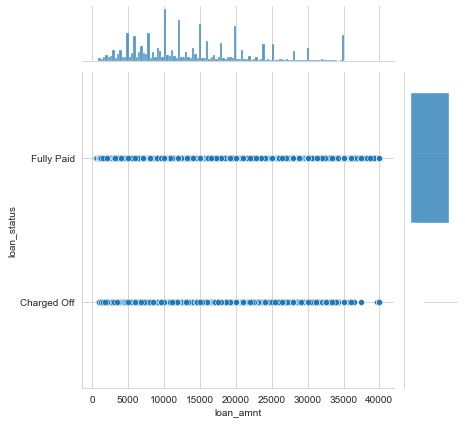

In [23]:
sns.jointplot(y='loan_status',x='loan_amnt',data=df)

## 2.4 Sample out outliers

In [82]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,335868.0,14522.747627,8386.593240,1000.00,8000.00,12400.00,20000.00,40000.00
int_rate,335868.0,13.795634,4.505201,5.32,10.64,13.35,16.78,30.99
installment,335868.0,445.158837,251.588273,28.75,263.78,388.20,583.79,1533.81
annual_inc,335868.0,75817.159947,61972.188563,5000.00,47000.00,65000.00,90000.00,8706582.00
dti,335868.0,17.719144,8.147837,0.00,11.63,17.25,23.42,380.53
open_acc,335868.0,11.598324,5.181585,1.00,8.00,11.00,14.00,90.00
pub_rec,335868.0,0.184921,0.543618,0.00,0.00,0.00,0.00,86.00
revol_bal,335868.0,16193.056674,20990.685224,0.00,6302.00,11480.00,19990.25,1743266.00
revol_util,335868.0,54.365450,23.962637,0.00,36.90,55.30,73.00,892.30
total_acc,335868.0,25.858912,11.901536,2.00,17.00,24.00,33.00,151.00


In [83]:
df.describe().loc['mean']/df.describe().loc['min']

loan_amnt               14.522748
int_rate                 2.593164
installment             15.483786
annual_inc              15.163432
dti                           inf
open_acc                11.598324
pub_rec                       inf
revol_bal                     inf
revol_util                    inf
total_acc               12.929456
mort_acc                      inf
pub_rec_bankruptcies          inf
dtype: float64

<font size='5px' color='blue'/> 3 Feature Engineering<font/>

## 3.1 Drop unecessery data

In [ ]:
df=df.drop('emp_title',axis=1)
    # Many titles, and many missing data

In [89]:
df.head(20).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0,20000.0,18000.0,13000.0,18900.0,26300.0,10000.0,35000.0,7500.0,35000.0,25975.0,18000.0,32350.0,11200.0,34000.0,20000.0
term,36 months,36 months,36 months,36 months,60 months,36 months,36 months,36 months,60 months,36 months,36 months,36 months,36 months,60 months,36 months,36 months,60 months,60 months,36 months,36 months
int_rate,11.44,11.99,10.49,6.49,17.27,13.33,5.32,11.14,10.99,16.29,13.11,14.64,9.17,12.29,6.62,8.39,21.98,12.29,7.9,6.97
installment,329.48,265.68,506.97,220.65,609.33,677.07,542.07,426.47,410.84,928.4,337.47,1207.13,239.1,783.7,797.53,567.3,893.11,250.79,1063.87,617.27
grade,B,B,B,A,C,C,A,B,B,C,B,C,B,C,A,A,E,C,A,A
sub_grade,B4,B5,B3,A2,C5,C3,A1,B2,B3,C5,B4,C3,B2,C1,A2,A5,E4,C1,A4,A3
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.,HR Specialist,Software Development Engineer,Office Depot,Application Architect,Regado Biosciences,Sodexo,Director Bureau of Equipment Inventory,Social Work/Care Manager,Regional Counsel,Pullman Regional Hospital,firefighter,Comcast Corporate office,principal,Pilot,Registered Nurse
emp_length,10+ years,4 years,< 1 year,6 years,9 years,10+ years,2 years,10+ years,10+ years,3 years,2 years,8 years,7 years,10+ years,9 years,8 years,10+ years,10+ years,10+ years,7 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,RENT,MORTGAGE,OWN,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0,86788.0,125000.0,46000.0,103000.0,115000.0,95000.0,130000.0,55000.0,157000.0,65000.0,45000.0,72000.0,81000.0,130580.0,85000.0


In [101]:
df['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396024     36 months
396025     60 months
396026     36 months
396027     36 months
396028     60 months
Name: term, Length: 335868, dtype: object

## 3.2 Dig new feature

## 3.3 Explore the effect of the new feature

## 3.4 Categorical Feature

In [50]:
pd.get_dummies(df['loan_status'])['Fully Paid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: Fully Paid, Length: 396030, dtype: uint8

In [53]:
pd.get_dummies(df['loan_status'])

,Charged Off,Fully Paid
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
396025,0,1
396026,0,1
396027,0,1
396028,0,1


<font size='5px' color='blue'/> 4 Preprocessing<font/>

In [84]:
X=df.drop('loan_status',axis=1).values
y=df['loan_status'].values

In [85]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
scaler=MinMaxScaler()

In [87]:
scaler.fit(X_train,y_train)

ValueError: could not convert string to float: ' 60 months'

# 

<font size='5px' color='blue'/> 5 Model Creating<font/>

<font size='5px' color='blue'/> 6 Training the model<font/>

## 6.1 Over Fitting Check

## 6.2 Over Fitting Solution

<font size='5px' color='blue'/> 7 Prediction<font/>

<font size='5px' color='blue'/> 8 Evaluation<font/>